<center>
# Pandas, Matplotlib exercise
</center>
**Due** : 2018-03-13 20:29:59

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

> **Warning**

> * <font color='red'> Do not use other packages except for `numpy`, `pandas`, `matplotlib` </font>

> * <font color='red'> Do not modify other code except for `YOUR CODE HERE` </font>

## Problem 1

(1) 연초부터 1년간 투자할 때 연말에 발생하는 수익금액의 분포가 평균 0, 표준편차 1의 정규분포인 투자안이 있다. 이 투자안을 10년간 매년 반복 투자했을 때, 10년 뒤 투자수익금액의 합계를 몬테카를로 시뮬레이션으로 생성할 수 있다. 이를 N(=100000)회  반복한 결과의 평균과 표준편차를 계산하고 출력하시오.

> **Warning**

> * <font color='red'> for문이나 while문을 사용하지 말고 numpy, pandas, matplotlib 패키지만 사용하시오 </font>

In [13]:
def invest_sim(N=100000):
    
    #################################
    #         YOUR CODE HERE        #
    # payoff_array : 1d numpy array #
    #################################
    payoff_array = np.random.randn(N,10).sum(1)
    
    return payoff_array

In [45]:
payoff_array = invest_sim()
print('AVG : ' + str(payoff_array.mean()))
print('STD : ' + str(payoff_array.std()))

AVG : 0.005286194110251695
STD : 3.1532833552703066


(2) 위의 투자안에 매년 투자를 유지하다가 (최대 100년) 연말에 누적 투자 수익이 2 이상 손실이면 폐업할 계획이다. 사업 유지 기간(년)을 몬테카를로 시뮬레이션으로 구하고 히스토그램(bin 개수 = 100)으로 도시하시오. 그리고 100년간 살아남은 경우의 개수를 출력하시오. (N=100000)

> **Warning**

> * <font color='red'> for문이나 while문을 사용하지 말고 numpy, pandas, matplotlib 패키지만 사용하시오 </font>


In [117]:
def invest_survive(N=100000, T=100):
    
    ##########################################
    #              YOUR CODE HERE            #
    # survival_period_array : 1d numpy array #
    ##########################################
    ret = np.random.randn(N,T)
    table = ret.cumsum(axis=1) <= -2
    temp = table*np.arange(1,T+1)
    survival_period_array = np.where(temp==0, T, temp).min(1)
    
    return survival_period_array

def count_survive(survival_period_array):
  
    ##################
    # YOUR CODE HERE #
    # count : int    #
    ##################
    count = (survival_period_array == 100).sum()

    return count

In [129]:
N = 7
T = 5
ret = np.random.randn(N,T)
ret

array([[ 0.69199228, -2.12553445,  0.44278813, -0.2876983 ,  0.93260716],
       [-0.57662135,  0.34728392, -0.05566114,  1.04277286, -0.13005044],
       [ 0.93362635, -2.23713352, -0.17993075, -0.5714759 , -0.11253417],
       [-0.92824134, -0.11029575,  0.87923828,  0.0208002 , -1.83823715],
       [ 1.85212382,  1.30449151,  0.6482482 ,  1.14379055, -0.32871619],
       [ 0.00863079, -0.61017175,  0.69008615,  0.33767871, -0.96379898],
       [-0.11986597,  0.9087914 , -0.45101207,  0.55749423,  0.05288239]])

In [132]:
table = ret.cumsum(axis=1) <= -2
table

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False,  True,  True],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [133]:
np.arange(1,T+1)

array([1, 2, 3, 4, 5])

In [134]:
temp = table*np.arange(1,T+1)
temp

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 4, 5],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [135]:
np.where(temp==0, T, temp)

array([[5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 4, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5],
       [5, 5, 5, 5, 5]])

In [136]:
np.where(temp==0, T, temp).min(1)

array([5, 5, 4, 5, 5, 5, 5])

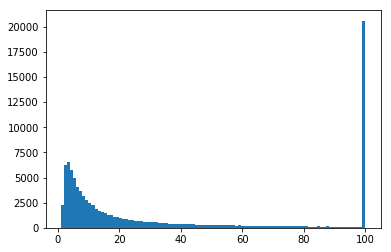

In [137]:
survival_period_array = invest_survive()
plt.hist(survival_period_array, bins=100)
plt.show()

In [119]:
print('number of survive 100 years : %d'%(count_survive(survival_period_array)))

number of survive 100 years : 20386


## Problem 2

Plain-vanilla 옵션의 블랙-숄즈 이론가격을 계산하는 함수를 구현하시오.

**Black-Scholes 옵션 가격 공식:**
$$
    C = Se^{-qt}N(d_1) - Ke^{-rt}N(d_2) \\
    P = Ke^{-rt}N(-d_2) - Se^{-qt}N(-d_1) 
$$
where
$$
    d_1 = \frac{\log{(\frac{S}{K})} + \left(r-q+\frac{1}{2}\sigma^2\right)t}{\sigma\sqrt{t}}
$$
* $S$ : 기초자산의 현재가격 (ex: 100)
* $K$ : 행사가격 (ex: 100)
* $r$ : 연속복리금리 (ex: 0.025)
* $q$ : 연속배당률 (ex: 0.01)
* $\sigma$ : 연변동성 (ex: 0.25)
* $t$ : 옵션의 연환산 잔여 만기 (ex: 0.24)

> Hint : $N$은 누적 표준 정규 분포 함수 = `norm.cdf`

In [120]:
from scipy.stats import norm

In [124]:
def bsprice(S=100, K=100, r=0.025, q=0.01, sigma=0.25, t=0.24):
        
    ##################
    # YOUR CODE HERE #
    # price : dict   #
    ##################
    
    d1 = (np.log(S/K) + (r - q + 0.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    
    # Call option price
    C = (S*np.exp(-q*t)*norm.cdf(d1, 0.0, 1.0) 
        - K*np.exp(-r*t)*norm.cdf(d2, 0.0, 1.0))
    
    # Put option price
    P = (K*np.exp(-r*t)*norm.cdf(-d2, 0.0, 1.0) 
        - S*np.exp(-q*t)*norm.cdf(-d1, 0.0, 1.0))

    price = {'Call':C, 'Put':P}
    
    return price

In [125]:
price = bsprice()
print('Call : %f'%(price['Call']))
print('Put  : %f'%(price['Put']))

Call : 5.043859
Put  : 4.685368


## Problem 3

[S&P500 index](https://www.marketwatch.com/investing/index/spx)는 미국 Standard and Poors(S&P)가 작성한 500개 종목의 주가 지수이다. S&P500 index는 물가 상승분을 반영하지 않아 실질 지수는 Consumer Price Index(CPI)로 할인해주어야 한다.
만약 t 시점의 지수가 $x_t$라고 한다면, t 시점의 실질 지수(real index) $\tilde{x}_t$와 실질 수익률 $r_t$는 다음과 같다.

$$
    \tilde{x_t} = \frac{CPI_0}{CPI_t}x_t \\
    r_t = \frac{\tilde{x_t}}{\tilde{x_{t-1}}} - 1
$$


다음과 같이 DataFrame을 받아 "real S&P500", "return" 이 계산된 DataFrame을 생성하는 함수를 완성하시오. 그리고 "S&P500"과 "real S&P500"의 그래프를 그려 비교하시오.

<img src="https://preview.ibb.co/j4HaDS/1.png" alt="1" border="0">

> Hint : [`shift`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html)를 사용하여 return을 구하시오

In [147]:
df = pd.read_csv('Lecture 3-2 pandas, matplotlib exercise.csv',
                 index_col='Date')

In [139]:
df

,Date,S&P500,CPI
0,2013-04-01,1597.569946,231.797
1,2013-05-01,1630.739990,231.893
2,2013-06-01,1606.280029,232.445
3,2013-07-01,1685.729980,232.900
4,2013-08-01,1632.969971,233.456
5,2013-09-01,1681.550049,233.544
6,2013-10-01,1756.540039,233.669
7,2013-11-01,1805.810059,234.100
8,2013-12-01,1848.359985,234.719
9,2014-01-01,1782.589966,235.347


In [126]:
def calc_real_return(df):
        
    #####################
    #  YOUR CODE HERE   #
    # df : pd.DataFrame #
    #####################
    df['real S&P500'] = df['S&P500']*df['CPI'][0]/df['CPI']
    df['return'] = df['S&P500']/df['S&P500'].shift(1) - 1

    return df

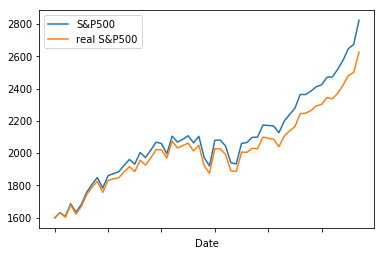

In [128]:
df_out = calc_real_return(df)
df_out[['S&P500','real S&P500']].plot()
plt.show()